# 0. Introdução

A análise abaixo foi realizada utilizando dados de vendas de bicicletas a partir da europa no site www.kaggle.com.

A motivação é entender quais locais realizam mais compras, ver a faixa etária que mais adquire, o gênero que mais adquire, a quantidade de compras por ano, o lucro, o custo e o rendimento. Sabendo isso pode ser direcionado ações para aumentar as vendas para determinadas regiões, indicar produtos mais vendidos para as regiões, poder aumentar o lucro da empresa.

Perguntas que tentaremos responder?
* Existe uma disparidade na venda para cada faixa etária?
* Existe uma disparidade na venda para cada gênero?
* Variação de lucro para cada ano?
* Qual a relação entre o lucro e os países?
* Qual a relação entre a quantidade vendida e os países?
* Qual o produto mais vendido?
* Existe uma relação entre o produto vendido e o gênero?
* Existe uma relação entre lucro e o gênero vendo em cada país?

Fonte do dataset: https://www.kaggle.com/datasets/prepinstaprime/europe-bike-store-sales

# 1. Carregando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

# 2. Carregando o dataset

In [2]:
df = pd.read_csv('Sales.csv')

In [3]:
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8.0,45.0,120.0,590.0,360.0,950.0
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23.0,45.0,120.0,1366.0,1035.0,2401.0
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20.0,45.0,120.0,1188.0,900.0,2088.0
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4.0,45.0,120.0,238.0,180.0,418.0


# 3. Fazendo a análise da base


In [4]:
# Verificando o número de linhas e colunas
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas")

O dataset possui 7589 linhas e 18 colunas


In [5]:
# Verificando informações das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7589 entries, 0 to 7588
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              7589 non-null   object 
 1   Day               7589 non-null   int64  
 2   Month             7589 non-null   object 
 3   Year              7589 non-null   int64  
 4   Customer_Age      7589 non-null   int64  
 5   Age_Group         7589 non-null   object 
 6   Customer_Gender   7589 non-null   object 
 7   Country           7589 non-null   object 
 8   State             7589 non-null   object 
 9   Product_Category  7589 non-null   object 
 10  Sub_Category      7588 non-null   object 
 11  Product           7588 non-null   object 
 12  Order_Quantity    7588 non-null   float64
 13  Unit_Cost         7588 non-null   float64
 14  Unit_Price        7588 non-null   float64
 15  Profit            7588 non-null   float64
 16  Cost              7588 non-null   float64


In [6]:
# Verificando se há algum dado nulo
df.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        1
Product             1
Order_Quantity      1
Unit_Cost           1
Unit_Price          1
Profit              1
Cost                1
Revenue             1
dtype: int64

In [7]:
# Verificando se há algum dado repetido
print(f"O dataset possui {df.duplicated().sum()} linha(s) duplicada(s)")

O dataset possui 106 linha(s) duplicada(s)


In [8]:
# Excluindo as linhas duplicadas
df.drop_duplicates(keep='first', inplace=True)

In [9]:
# Análise estatística
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,7483.000000,7483.000000,7483.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000,7482.000000
mean,15.389951,2014.587064,36.170921,14.041700,9.329457,24.773857,112.439054,80.828388,193.267442
std,8.872377,1.114534,11.018625,8.843868,17.037567,45.809710,208.905331,143.082967,350.829341
min,1.000000,2013.000000,17.000000,1.000000,2.000000,5.000000,2.000000,2.000000,4.000000
25%,8.000000,2014.000000,28.000000,6.000000,2.000000,5.000000,27.000000,20.000000,47.000000
50%,15.000000,2014.000000,35.000000,13.000000,2.000000,5.000000,53.000000,42.000000,96.000000
75%,23.000000,2016.000000,43.000000,22.000000,4.000000,10.000000,89.000000,62.000000,152.750000
max,31.000000,2016.000000,87.000000,32.000000,59.000000,159.000000,2214.000000,1350.000000,3564.000000


# 4. Análise Univariada

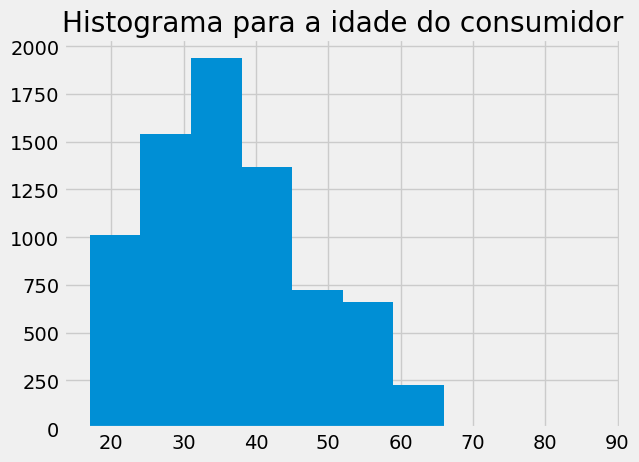

In [10]:
_ = plt.hist(df['Customer_Age'])
_ = plt.title('Histograma para a idade do consumidor')

A quantidade maior dos consumidores está concentrada entre 30 e 45 anos.

Text(0.5, 1.0, 'Total de pessoas por grupo de idade')

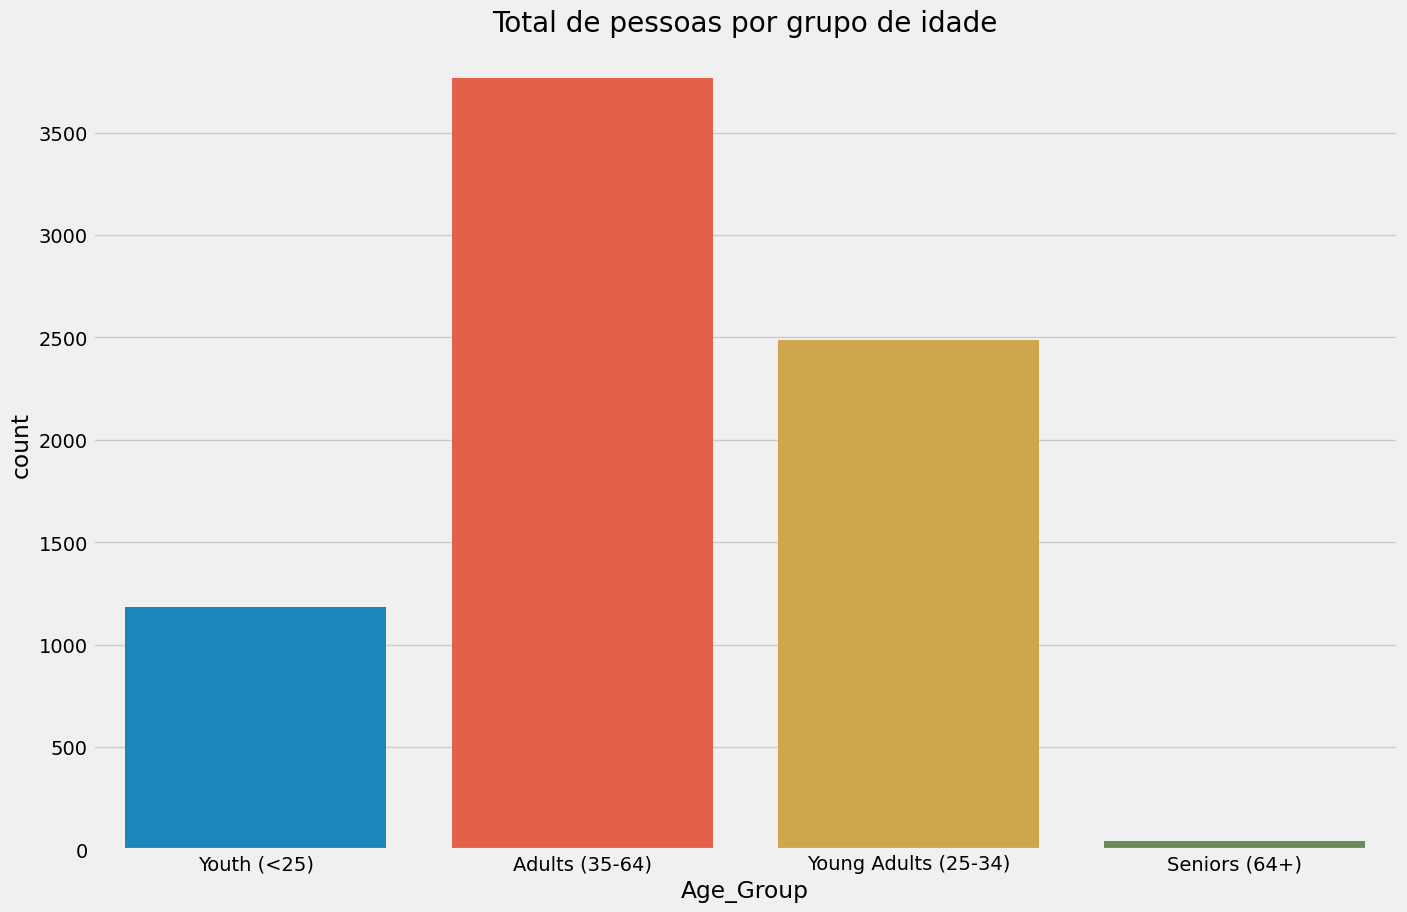

In [11]:
plt.figure(figsize=(15, 10))
sns.countplot(data = df, x = 'Age_Group')
plt.title('Total de pessoas por grupo de idade')

Como visto no histograma anterior, prevalece os adultos como grupo predominante na base.

Text(0.5, 1.0, 'Total de pessoas por gênero')

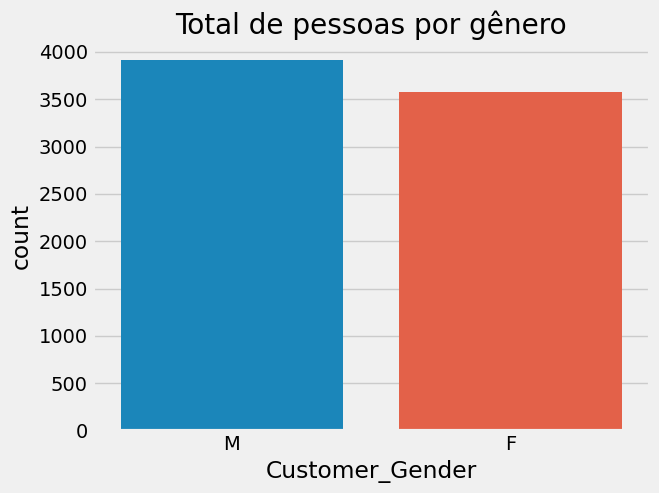

In [12]:
sns.countplot(data = df, x = 'Customer_Gender')
plt.title('Total de pessoas por gênero')

Temos mais homens que mulheres.

# 5. Análise multivariada

Text(0.5, 1.0, 'Total de pessoas por grupo de idade agrupados por gênero')

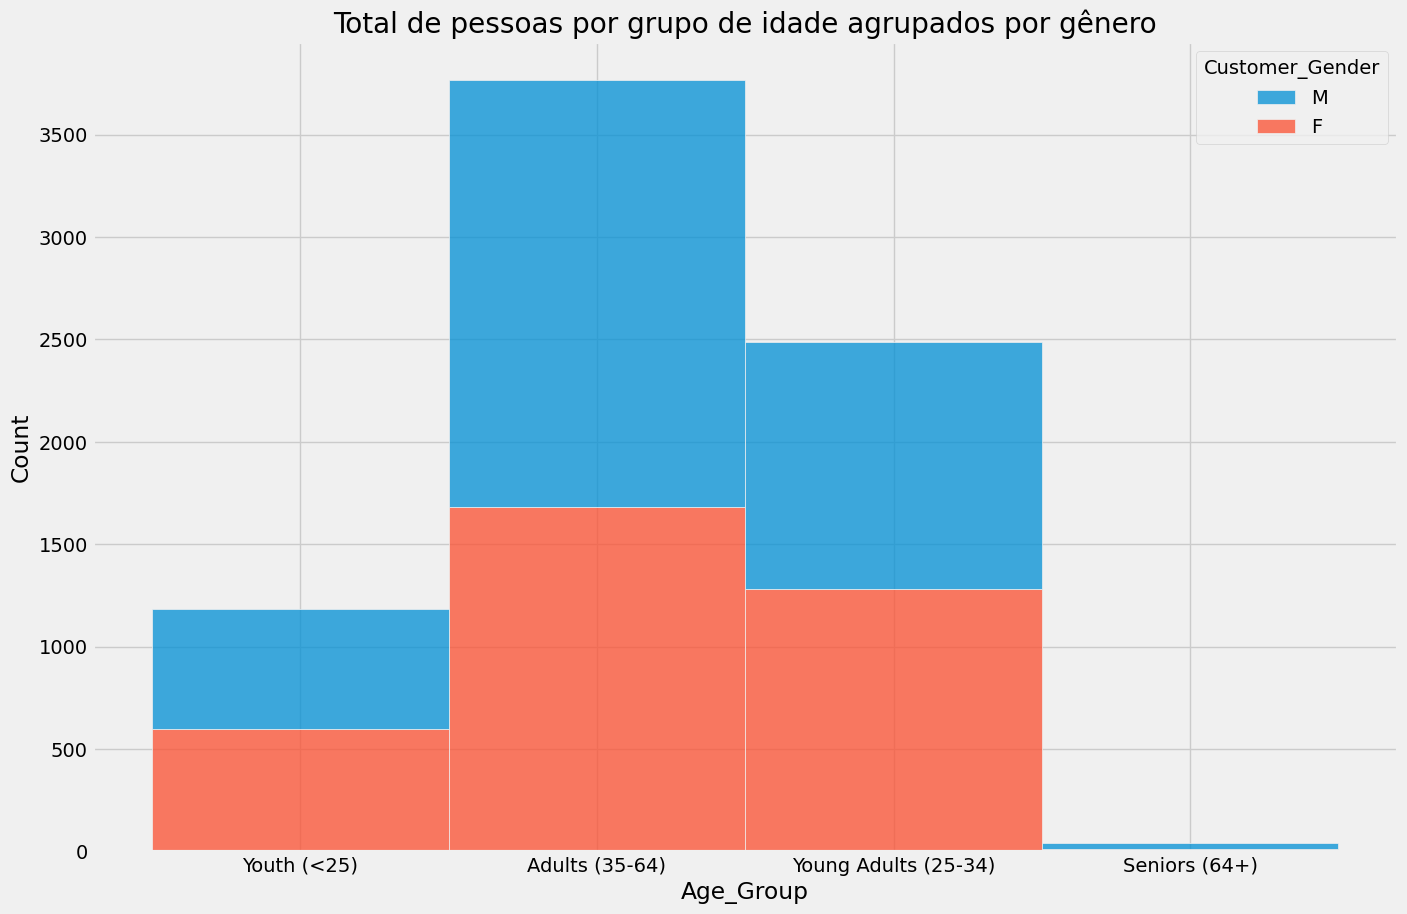

In [13]:
plt.figure(figsize=(15, 10))
sns.histplot(data = df, x = 'Age_Group', hue='Customer_Gender', multiple="stack")
plt.title('Total de pessoas por grupo de idade agrupados por gênero')

**1 -Existe uma disparidade na venda para cada gênero?**

Para responder a pergunta, vamos analisar o total de quantidade de pedidos para cada gênero.

In [14]:
df2 = df.groupby("Customer_Gender").sum().reset_index()
df2

<ipython-input-14-773d8da99133>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2 = df.groupby("Customer_Gender").sum().reset_index()


,Customer_Gender,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,F,53521,7196061,128459,49595.0,34358.0,91305.0,392902.0,281741.0,674643.0
1,M,61642,7879094,142208,55465.0,35445.0,94053.0,448367.0,323017.0,771384.0


Text(0.5, 1.0, 'Total de pedidos para cada gênero')

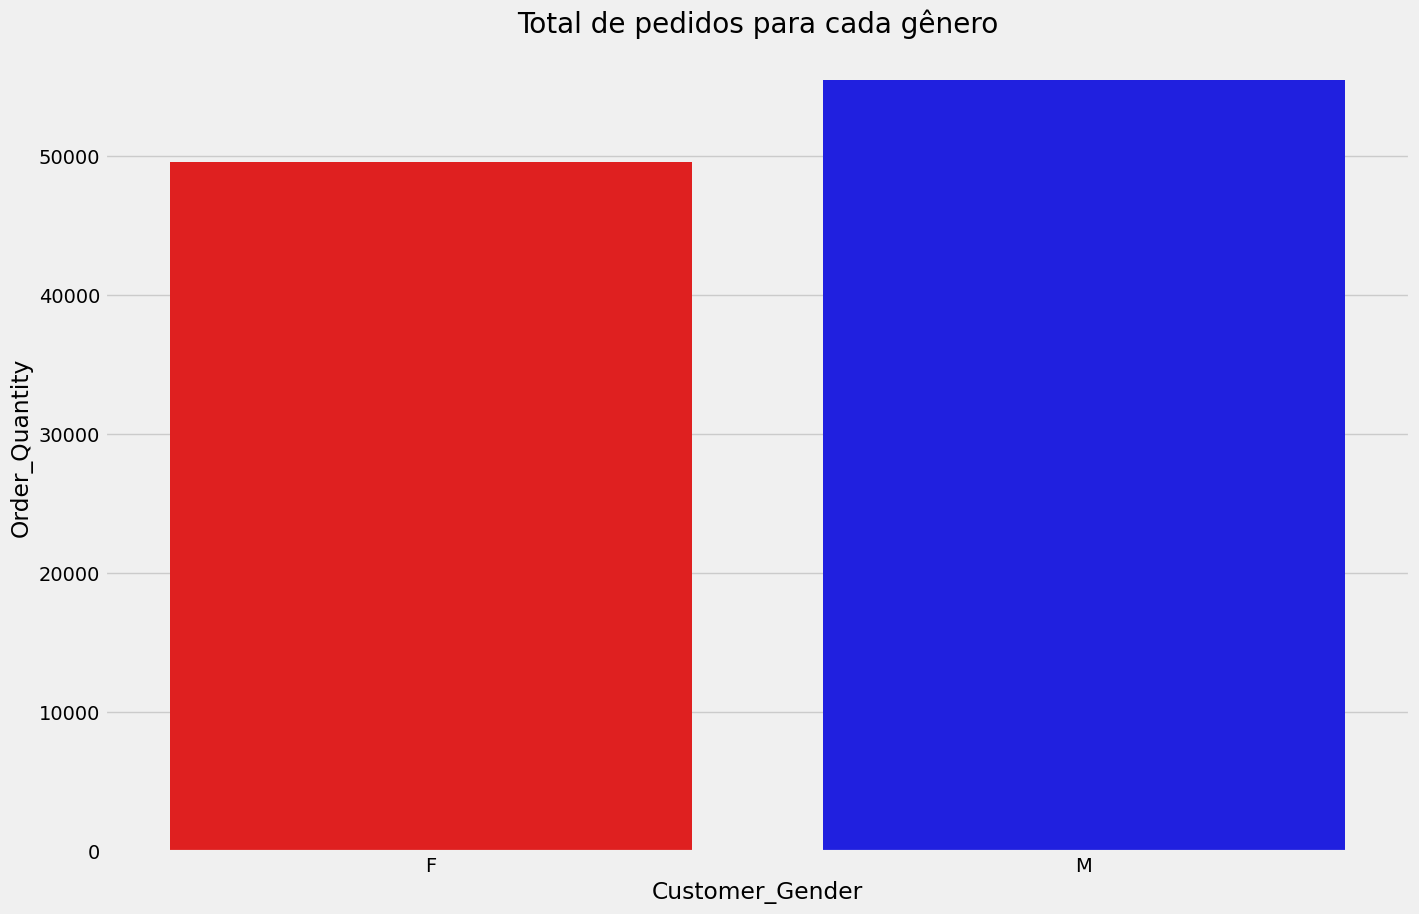

In [15]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df2, x = 'Customer_Gender', y = 'Order_Quantity', palette=['red', 'blue'])
plt.title('Total de pedidos para cada gênero')

Como podemos observar, num geral o genêro masculino fez mais compras nesse período de tempo.

**2. Existe uma disparidade na venda para cada faixa etária?**

Para responder a pergunta, vamos analisar o total de quantidade de pedidos para cada faixa etária.

In [16]:
df3 = df.groupby("Age_Group").sum().reset_index()
df3

<ipython-input-16-b5739f0bec88>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df.groupby("Age_Group").sum().reset_index()


,Age_Group,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Adults (35-64),57303,7586994,168064,52856.0,36656.0,97540.0,460665.0,326477.0,787142.0
1,Seniors (64+),782,88660,2990,647.0,536.0,1416.0,5034.0,3538.0,8572.0
2,Young Adults (25-34),38096,5012270,74208,35384.0,22500.0,59611.0,263911.0,192235.0,456146.0
3,Youth (<25),18982,2387231,25405,16173.0,10111.0,26791.0,111659.0,82508.0,194167.0


Text(0.5, 1.0, 'Total de pedidos para cada faixa etária')

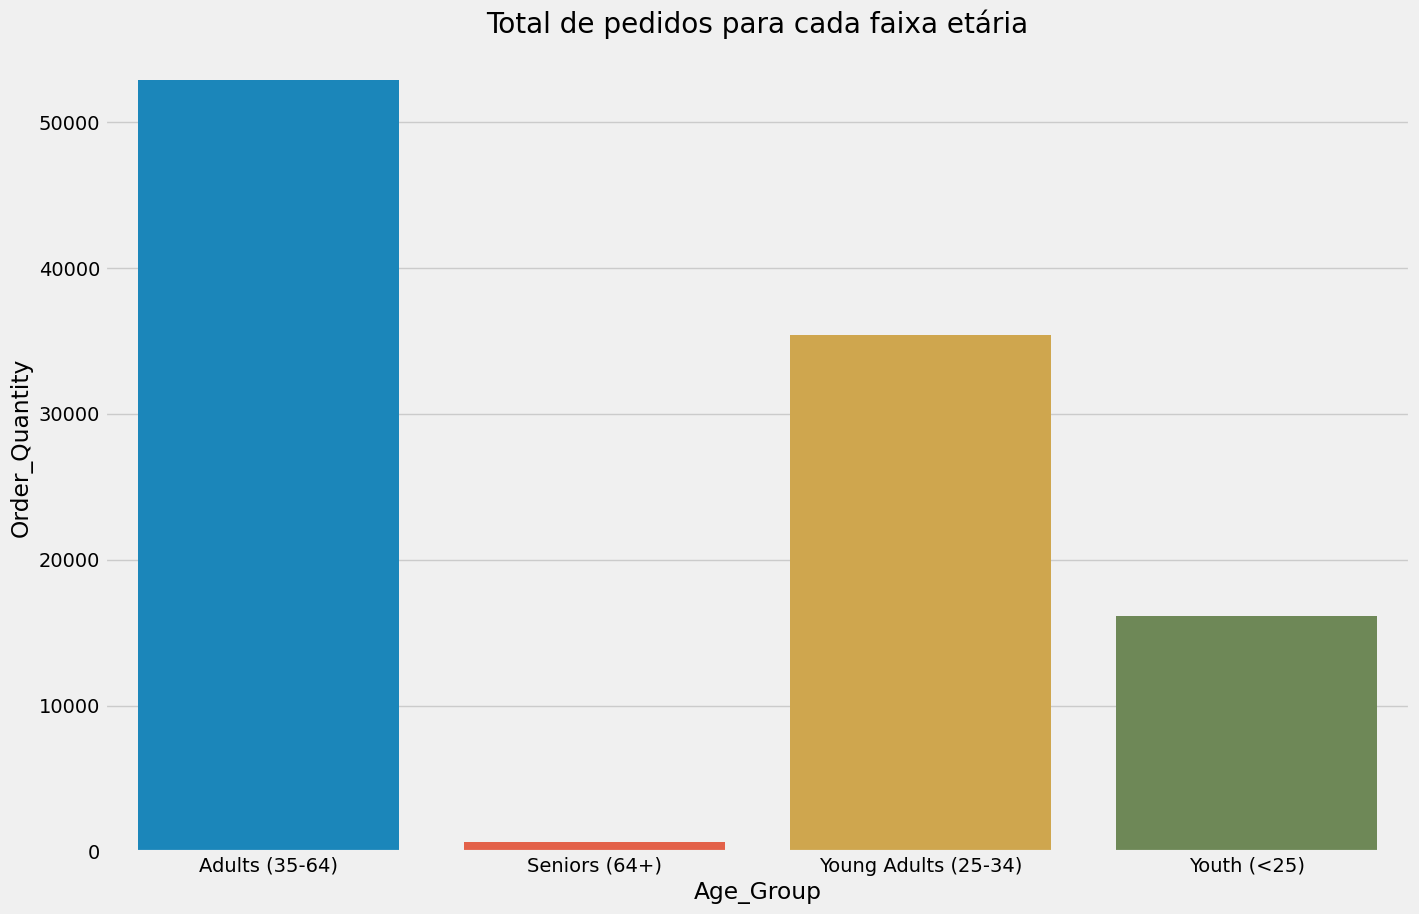

In [17]:
plt.figure(figsize=(15, 10))
sns.barplot(data = df3, x = 'Age_Group', y = 'Order_Quantity')
plt.title('Total de pedidos para cada faixa etária')

Como podemos observar, a faixa etária que faz mais pedidos são os adultos que também são maioria dentro da base

**3. Existe um aumento no lucro para cada ano?**

Para responder a pergunta vamos olhar a variável Profit e sua variação para cada ano

In [18]:
df4 = df.groupby('Year').sum().reset_index()
df4

<ipython-input-18-d80ac9ab3af4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4 = df.groupby('Year').sum().reset_index()


,Year,Day,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013,23327,54882,21405.0,16345.0,43467.0,187385.0,135668.0,323053.0
1,2014,34388,80855,31950.0,18559.0,49214.0,243209.0,173927.0,417136.0
2,2015,23173,54475,20699.0,16377.0,43554.0,179261.0,129767.0,309028.0
3,2016,34275,80455,31006.0,18522.0,49123.0,231414.0,165396.0,396810.0


Text(0.5, 1.0, 'Lucros totais ao decorrer dos anos')

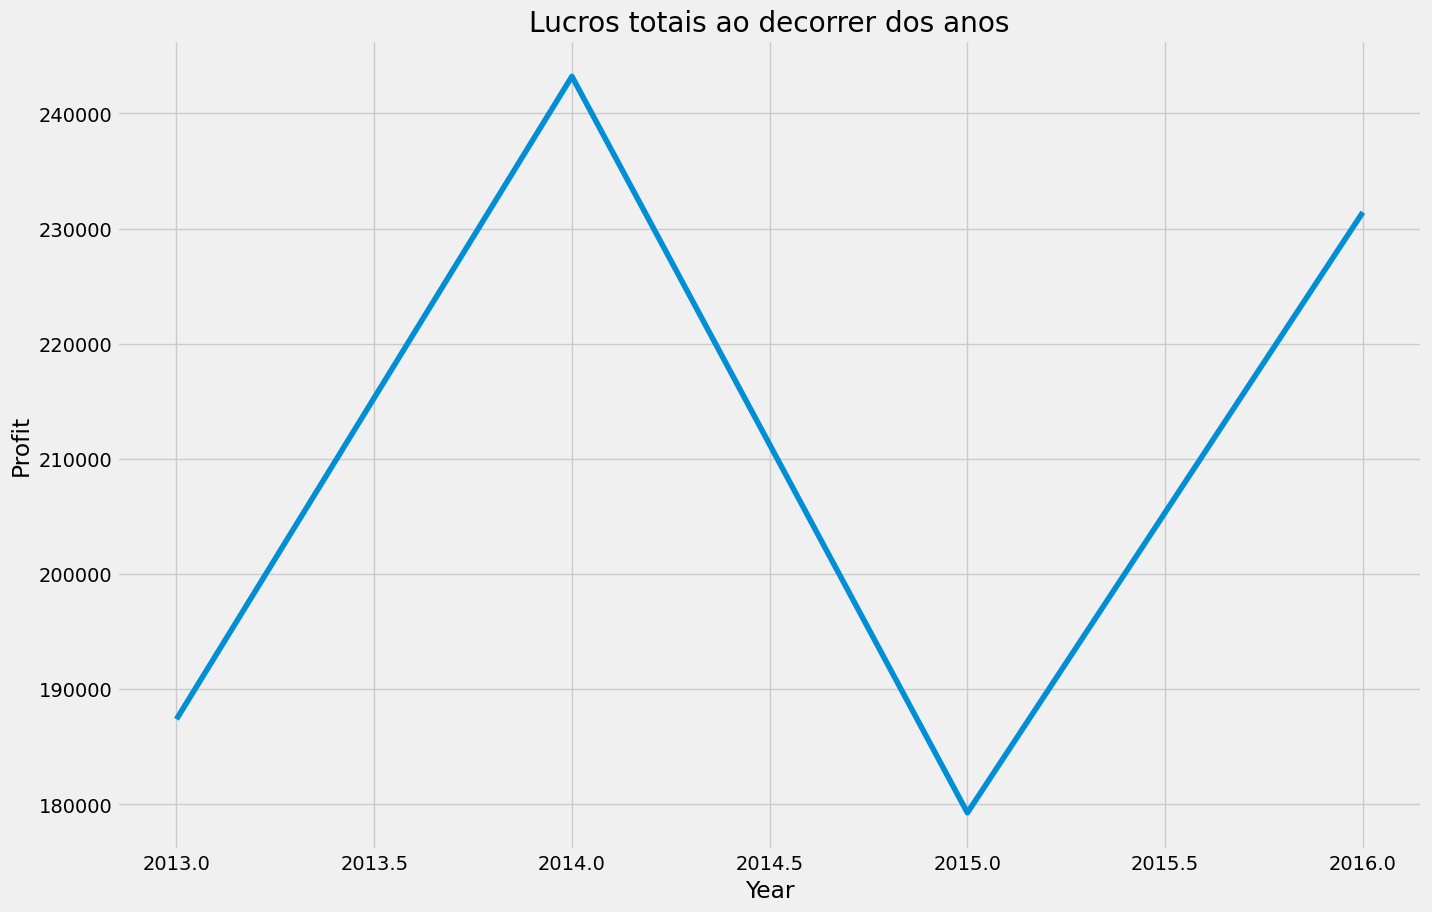

In [21]:
plt.figure(figsize=(15,10))
sns.lineplot(data = df4, x = 'Year', y = 'Profit')
plt.title('Lucros totais ao decorrer dos anos')

O lucro caiu de 2014 para 2015 e voltou a subir em 2016.

**4. Qual a relação entre o lucro e os países?**

Para responder a pergunta, vamos precisar analisar a variável profit por cada região.

In [22]:
df5 = df.groupby('Country').sum().reset_index()
df5

<ipython-input-22-f2a364b8dbcf>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df5 = df.groupby('Country').sum().reset_index()


,Country,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Australia,18142,2357109,41175,16207.0,13659.0,36557.0,134834.0,108921.0,243755.0
1,Canada,19599,2556516,46876,17841.0,10245.0,27040.0,149837.0,94198.0,244035.0
2,France,12591,1631798,29916,11592.0,6320.0,16756.0,72750.0,58374.0,131124.0
3,Germany,11122,1527035,27235,10721.0,6374.0,16992.0,84659.0,61587.0,146246.0
4,United Kingdom,16030,2032738,37514,13986.0,8080.0,21501.0,103613.0,67212.0,170825.0
5,United States,37679,4969959,87951,34713.0,25125.0,66512.0,295576.0,214466.0,510042.0


Text(0.5, 1.0, 'Lucros por cada país')

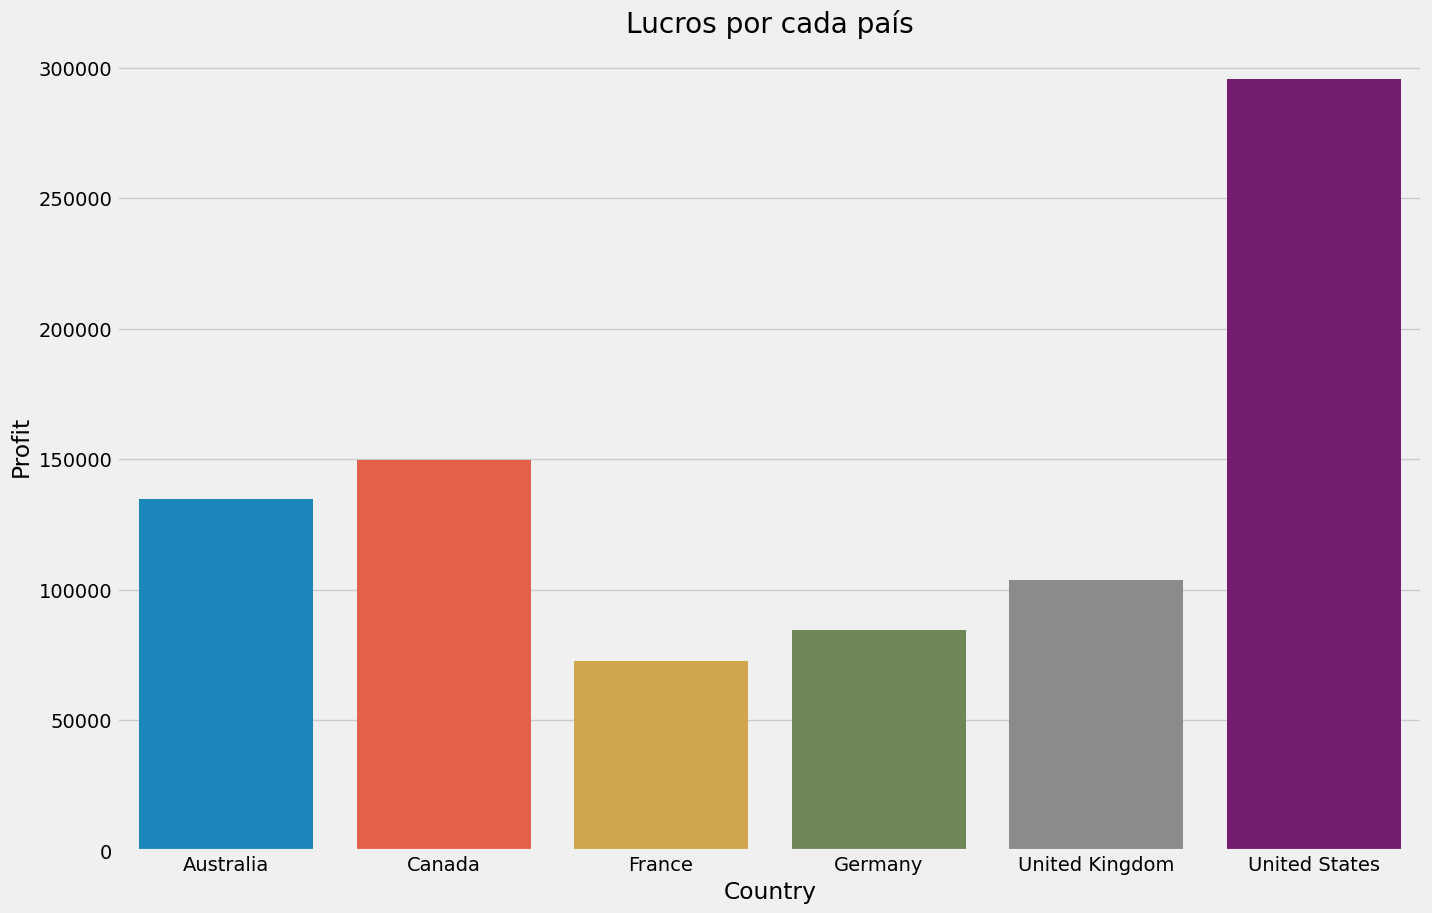

In [23]:
plt.figure(figsize=(15,10))
sns.barplot(data = df5, x = 'Country', y = 'Profit')
plt.title('Lucros por cada país')

Podemos ver que os Estados Unidos é o país que mais gera Lucro na compra das bicicletas.

**5. Qual a relação entre a quantidade vendida e os países?**

Para responder a pergunta preciso analisar a variável de quantidade e agrupar os dados por país.

In [24]:
df6 = df.groupby('Country').sum().reset_index()
df6

<ipython-input-24-414977e90010>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df6 = df.groupby('Country').sum().reset_index()


,Country,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,Australia,18142,2357109,41175,16207.0,13659.0,36557.0,134834.0,108921.0,243755.0
1,Canada,19599,2556516,46876,17841.0,10245.0,27040.0,149837.0,94198.0,244035.0
2,France,12591,1631798,29916,11592.0,6320.0,16756.0,72750.0,58374.0,131124.0
3,Germany,11122,1527035,27235,10721.0,6374.0,16992.0,84659.0,61587.0,146246.0
4,United Kingdom,16030,2032738,37514,13986.0,8080.0,21501.0,103613.0,67212.0,170825.0
5,United States,37679,4969959,87951,34713.0,25125.0,66512.0,295576.0,214466.0,510042.0


Text(0.5, 1.0, 'Total de vendas por cada país')

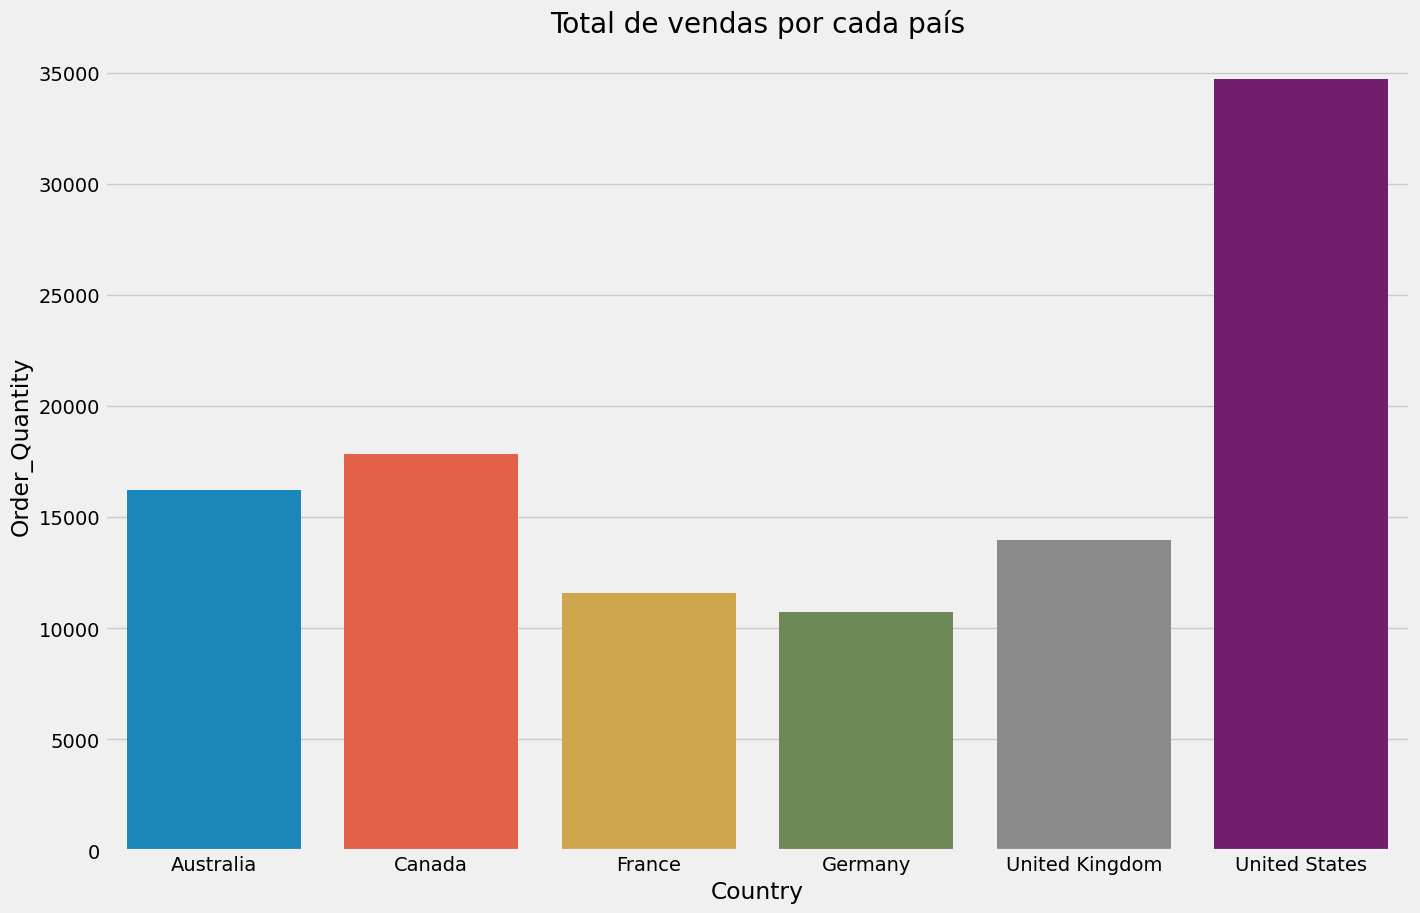

In [30]:
plt.figure(figsize=(15,10))
sns.barplot(data = df6, x = 'Country', y = 'Order_Quantity')
plt.title('Total de vendas por cada país')

Conforme esperado ao observar os lucros, os Estados Unidos também são o país que mais adquirem as bicicletas.

**6. Qual o produto mais vendido?**

Para analisar o produto mais vendido, precisamos agrupar os dados pelos produtos e levar em consideração a variável quantidade de vendas.

In [27]:
df7 = df.groupby('Product').sum().reset_index()
df7

<ipython-input-27-ff6069261cf7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df7 = df.groupby('Product').sum().reset_index()


,Product,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,All-Purpose Bike Stand,7155,908533,16606,2391.0,26609.0,71709.0,200350.0,141069.0,341419.0
1,Hitch Rack - 4-Bike,9662,1200662,22398,4753.0,26820.0,71520.0,305326.0,213885.0,519211.0
2,Mountain Bottle Cage,20671,2727776,49069,20757.0,5416.0,13540.0,105620.0,83028.0,188648.0
3,Road Bottle Cage,12610,1603637,30084,12458.0,2388.0,7164.0,64336.0,37374.0,101710.0
4,Water Bottle - 30 oz.,65047,8632533,152472,64701.0,8570.0,21425.0,165637.0,129402.0,295039.0


Text(0.5, 1.0, 'Total de vendas por cada produto')

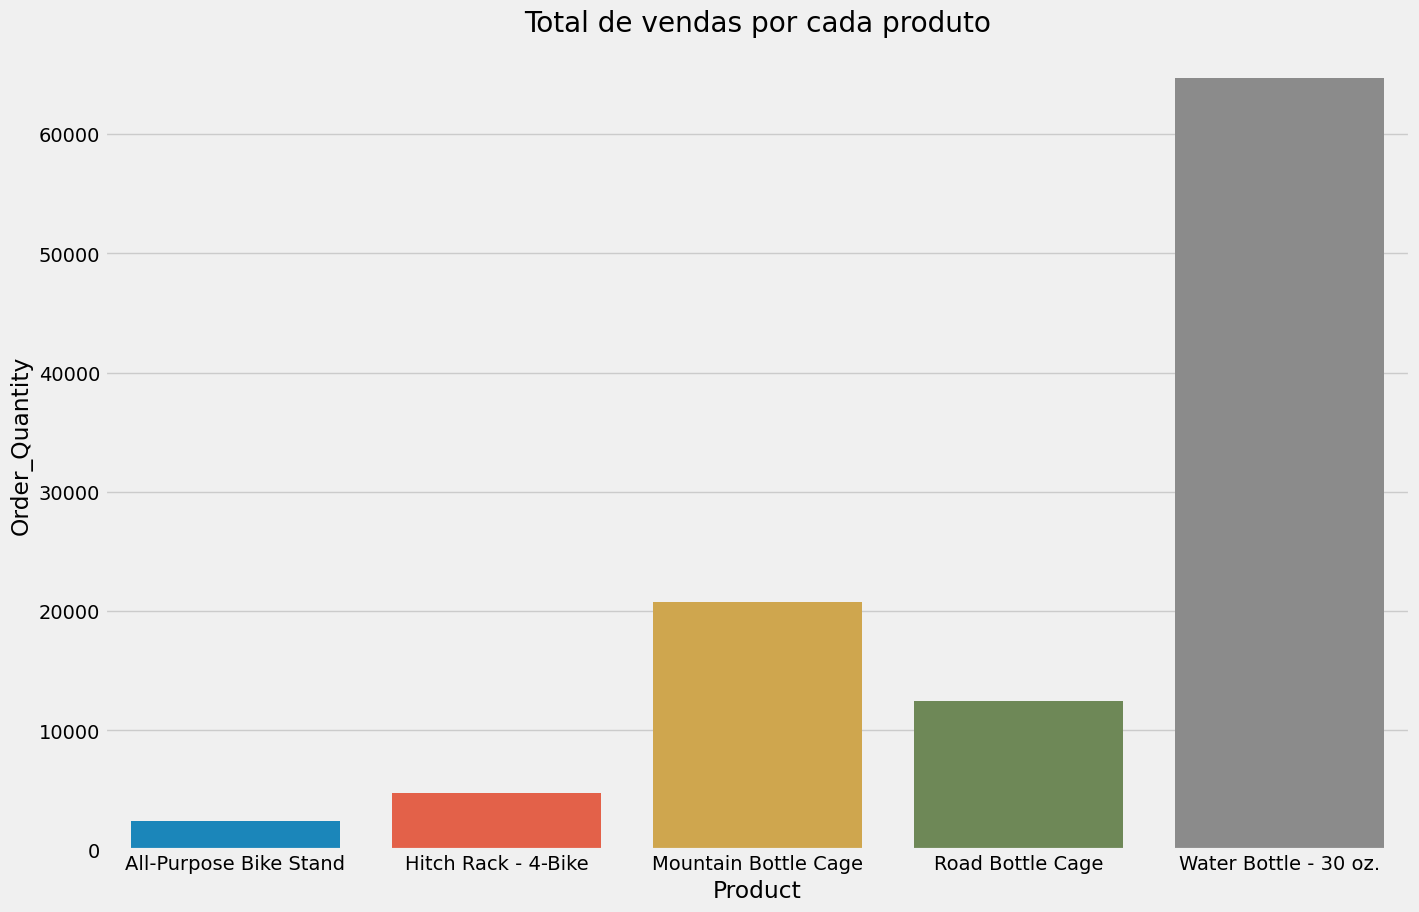

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(data = df7, x = 'Product', y = 'Order_Quantity')
plt.title('Total de vendas por cada produto')

Como podemos ver, o produto mais vendido é uma garrafa de água e não uma bicicleta como era de se esperar para uma loja de bicicletas.

**7. Existe uma relação entre o produto vendido e o gênero?**

Text(0.5, 1.0, 'Total de vendas por cada produto agrupado por gênero')

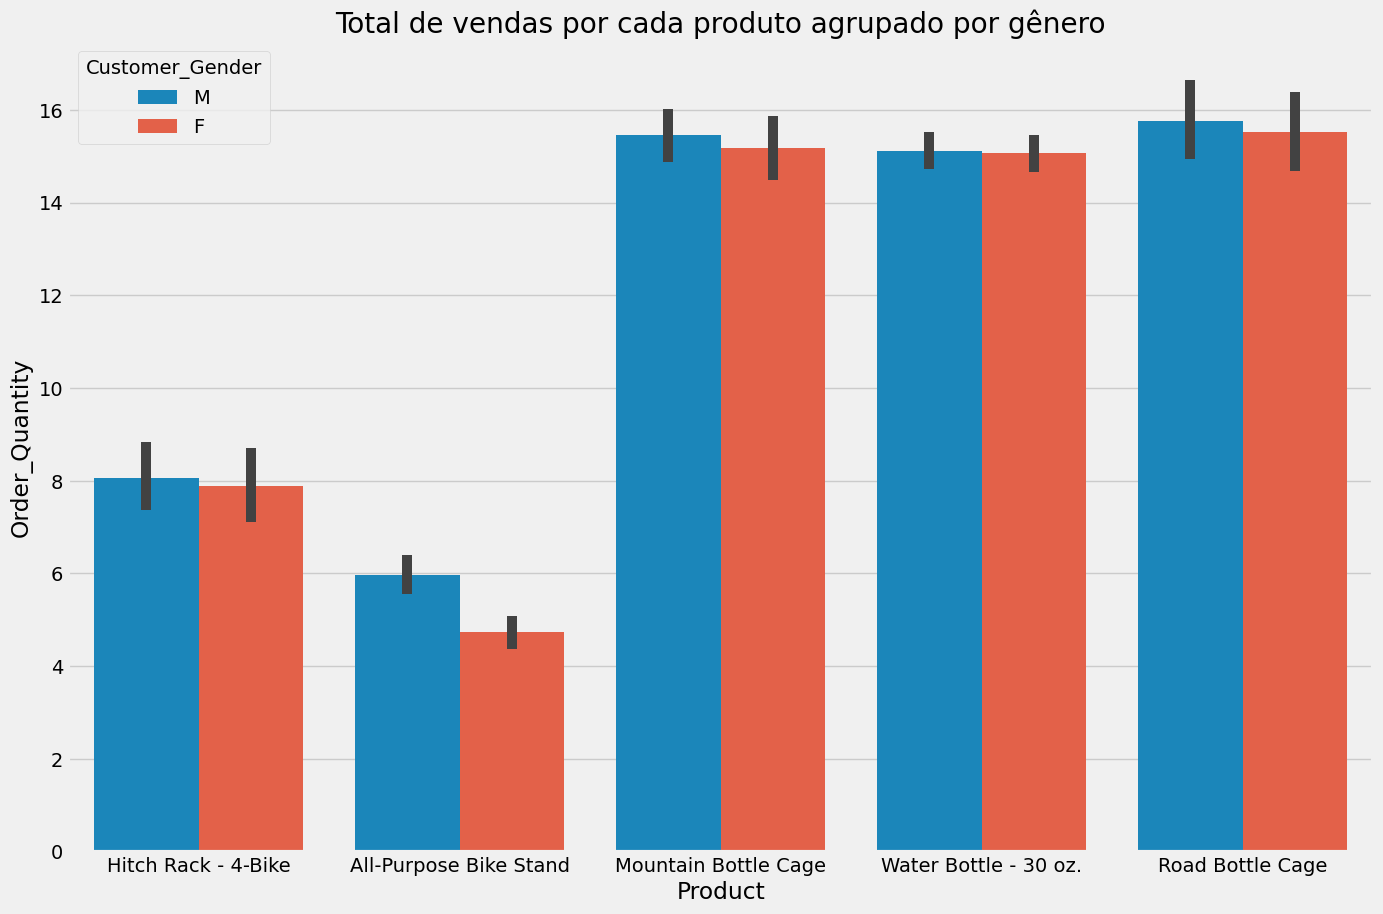

In [34]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'Product', y = 'Order_Quantity', hue='Customer_Gender')
plt.title('Total de vendas por cada produto agrupado por gênero')

Apenas o All_Purpose Bike Stand parece haver uma diferença maior entre os gêneros, os produtos restantes estão bem próximos.

**8. Existe uma relação entre lucro e o gênero vendo em cada país?**

Text(0.5, 1.0, 'Lucro pro gênero agrupado por país')

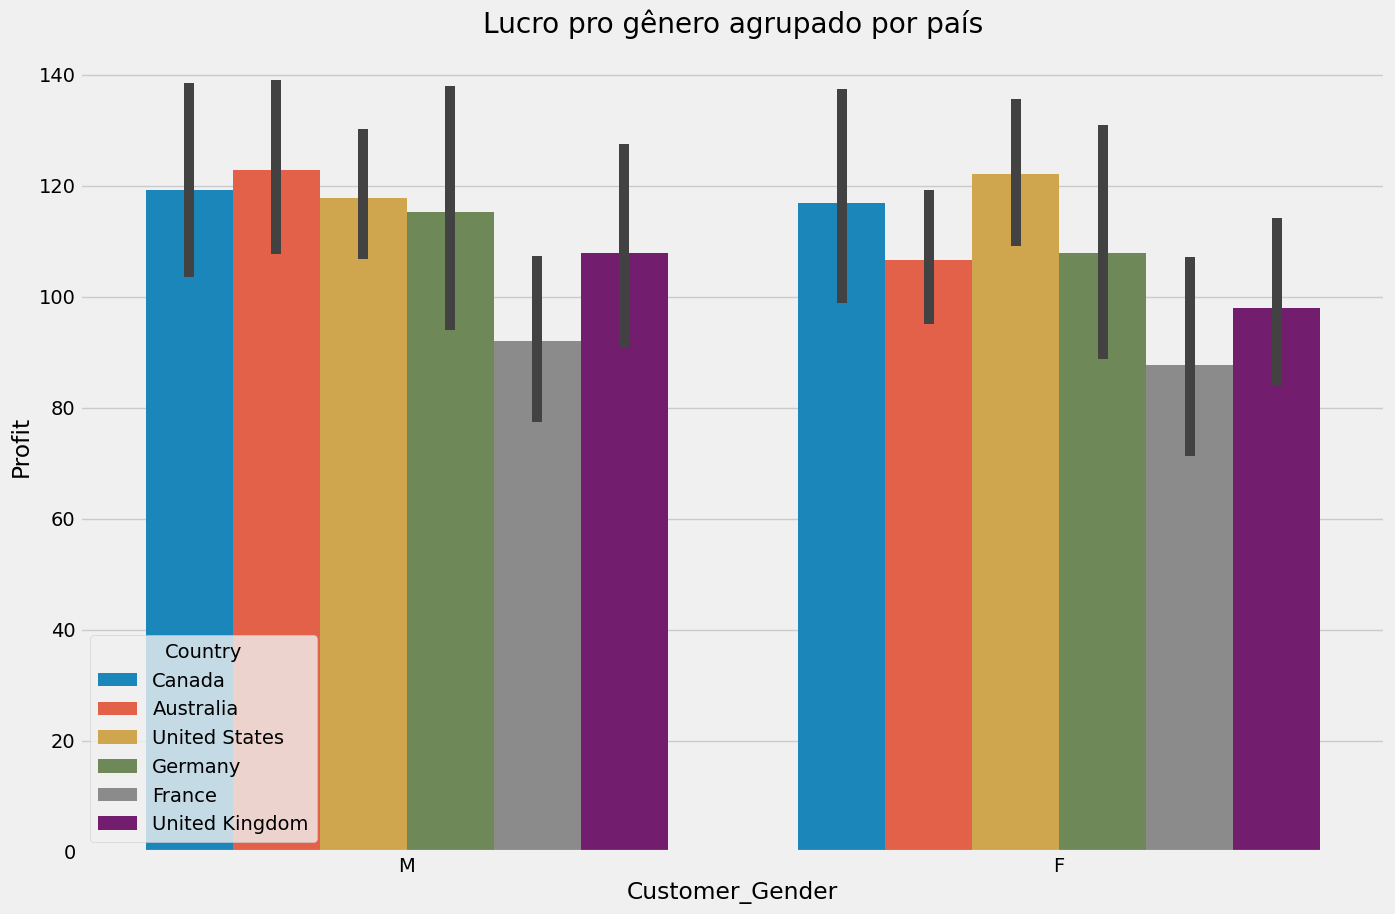

In [38]:
plt.figure(figsize=(15,10))
sns.barplot(data = df, x = 'Customer_Gender', y = 'Profit', hue='Country')
plt.title('Lucro pro gênero agrupado por país')

Analisando o lucro dividido por gênero e agrupado por país, podemos ver que entre os homens, a Austrália lidera mas nas mulheres os EUA estão na frente nesse quesito, com o Canadá em segundo em ambos os casos.